## Open Landsat .tif Files in Python


In [1]:
# Import ncessary packages
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import mapping

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [2]:
# Define the file path
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

glob(os.path.join(landsat_post_fire_path, '*'))

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_0

In [3]:
# Grab bands 2 through band 5
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[2-5]*.tif"))

all_landsat_post_bands

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [4]:
# sort bands
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [5]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

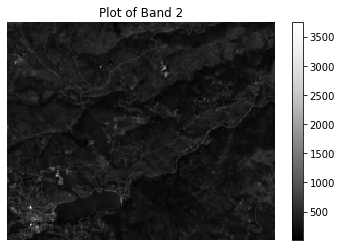

In [6]:
# Plot band 2
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

f, ax = plt.subplots()
landsat_post_xr.plot.imshow(ax =ax,
                           cmap="Greys_r")
ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

In [10]:
# Open up boundary extent using GeoPandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)


In [11]:
# Get the CRS of your data
landsat_crs = es.crs_check(all_landsat_post_bands[0])

print("landsat CRS is: ", landsat_crs)
print("Fire boundary CRS is: ", fire_boundary.crs)

landsat CRS is:  EPSG:32613
Fire boundary CRS is:  epsg:4269


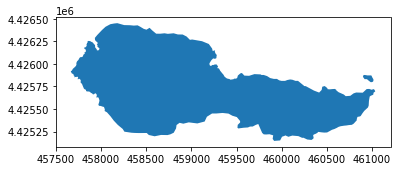

In [13]:
# Reproject data to CRS of raster data
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

# Plot the fire boundary
fire_boundary_utmz13.plot()
plt.show()


In [16]:
landsat_post_xr_clip = rxr.open_rasterio(all_landsat_post_bands[0]).rio.clip(
    fire_boundary_utmz13.geometry,
    from_disk=True).squeeze()

# Notice the x and y data dimensions of your data have changed
landsat_post_xr_clip

<xarray.DataArray (y: 44, x: 113)>
array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)
Coordinates:
  * x            (x) float64 4.577e+05 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
    band         int32 1
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -32768

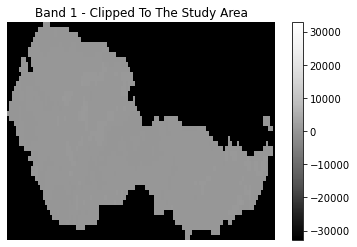

In [20]:
# Plot the data
f, ax = plt.subplots()
landsat_post_xr_clip.plot.imshow(ax=ax,
                                cmap="Greys_r")
ax.set_title("Band 1 - Clipped To The Study Area")
ax.set_axis_off()
plt.show()

In [21]:
# Clean the data
valid_range = (0, 10000)
# Only run this step if a valid range tuple is provided
if valid_range:
    mask = ((landsat_post_xr_clip < valid_range[0]) | (
        landsat_post_xr_clip > valid_range[1]))
    landsat_post_xr_clip = landsat_post_xr_clip.where(
        ~xr.where(mask, True, False))

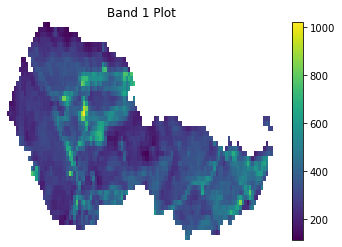

In [23]:
# Plot the data
f, ax = plt.subplots()
landsat_post_xr_clip.plot.imshow(ax=ax)
ax.set_title("Band 1 Plot")
ax.set_axis_off()
plt.show()

## A Function to Crop and Clean Landsat Data


In [24]:
def open_clean_band(band_path, clip_extent, valid_range=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    clip_extent : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE: this will 
        fail if the clip extent is in a different CRS than the raster data.

    valid_range : tuple (optional)
        The min and max valid range for the data. All pixels with values outside
        of this range will be masked.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Oops, I need a geodataframe object for this to work.")
        print(err)

    cleaned_band = rxr.open_rasterio(band_path,
                                     masked=True).rio.clip(clip_bound,
                                                           from_disk=True).squeeze()

    # Only mask the data if a valid range tuple is provided
    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band = landsat_post_xr_clip.where(
            ~xr.where(mask, True, False))

    return cleaned_band

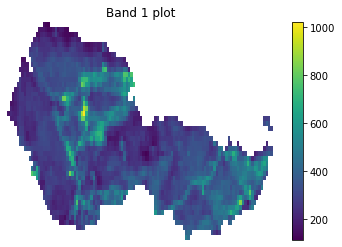

In [27]:
# test the function
cleaned_band = open_clean_band(all_landsat_post_bands[0], fire_boundary_utmz13)

# plot the data
f, ax = plt.subplots()
cleaned_band.plot(ax=ax)
ax.set_title("Band 1 plot")
ax.set_axis_off()
plt.show()

In [28]:
# Open up boundary extent using GeoPandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [31]:
# Get a list of required bands - bands 2 through 5
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[2-5]*.tif"))

#sort the list
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [32]:
# Reproject your vector layer
landsat_crs = es.crs_check(all_landsat_post_bands[0])

# Reproject fire boundary for clipping
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [33]:
post_all_bands = []
for i, aband in enumerate(all_landsat_post_bands):
    cleaned = open_clean_band(aband, fire_boundary_utmz13)
    # This line below is only needed if you wish to stack and plot your data
    cleaned["band"] = i+1
    post_all_bands.append(cleaned)


In [34]:
# OPTIONAL - Stack the data
post_fire_stack = xr.concat(post_all_bands, dim="band")
post_fire_stack

<xarray.DataArray (band: 4, y: 44, x: 113)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 4.577e+05 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
  * band         (band) int64 1 2 3 4
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0

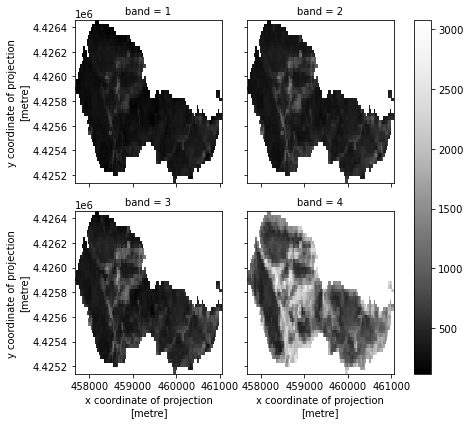

In [36]:
# Plot the final stacked data
post_fire_stack.plot.imshow(col="band",
                           col_wrap= 2,
                           cmap="Greys_r")

plt.show()

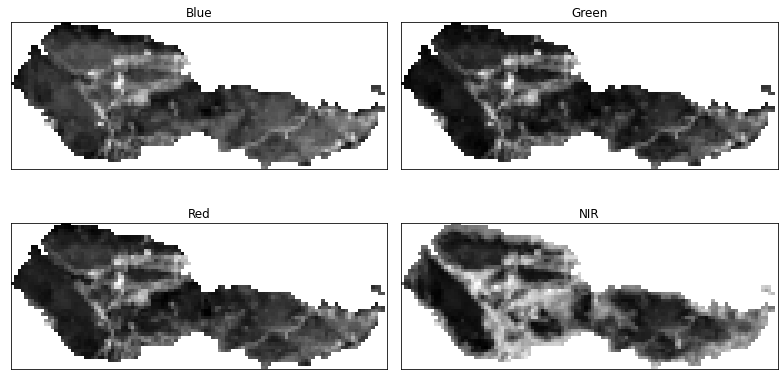

In [39]:
# Plotting using earthpy
band_titles = ["Blue", "Green", "Red", "NIR"]

ep.plot_bands(post_fire_stack,
             figsize=(11, 6),
             cols= 2,
             title=band_titles,
             cbar=False)
plt.show()

## Create an RGB Plot of Your Landsat Raster Data


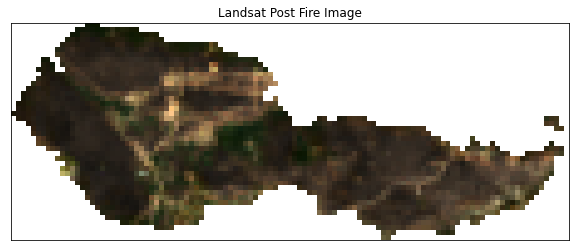

In [40]:
# Plot array
ep.plot_rgb(post_fire_stack,
           rgb=[2, 1, 0],
           title="Landsat Post Fire Image")

plt.show()